In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [26]:
## Convert to NumpyArray for SVM features
#def toNumpyArray(sequence_bagged):
#    length = max(map(len, sequence_bagged))
 #   return numpy.array([words+['space']*(length-len(words)) for words in sequence_bagged])

In [2]:
trainmain_df = pd.read_csv('./data2/train_data_bagged.csv')
testmain_df = pd.read_csv('./data2/test_data_bagged.csv')
trainmain_df.rename({'0':'sequence','label':'label'},axis=1,inplace=True)
testmain_df.rename({'0':'sequence'},axis=1,inplace=True)
testmain_df.columns

Index(['sequence'], dtype='object')

In [3]:
testmain_df

,sequence
0,AATC ATCT TCTC CTCT TCTG CTGT TGTT GTTG TTGT T...
1,TTCT TCTC CTCT TCTA CTAA TAAG AAGA AGAA GAAA A...
2,ACAT CATT ATTT TTTT TTTA TTAC TACG ACGG CGGT G...
3,CACT ACTG CTGA TGAA GAAA AAAA AAAA AAAA AAAA A...
4,GGGA GGAG GAGT AGTG GTGG TGGC GGCA GCAA CAAC A...
...,...
173,TAAA AAAT AATT ATTG TTGC TGCA GCAT CATG ATGT T...
174,GGAT GATG ATGT TGTG GTGC TGCT GCTT CTTA TTAG T...
175,ATTC TTCA TCAG CAGA AGAA GAAA AAAT AATT ATTA T...
176,ACGG CGGT GGTT GTTT TTTT TTTA TTAA TAAG AAGT A...


In [4]:
trainmain_df['sequence'].values

array(['TTAA TAAT AATT ATTT TTTG TTGT TGTC GTCC TCCT CCTT CTTA TTAT TATT ATTT TTTG TTGA TGAT GATT ATTA TTAA TAAG AAGA AGAA GAAG AAGA AGAA GAAT AATA ATAA TAAA AAAT AATC ATCT TCTT CTTA TTAT TATA ATAT TATA ATAT TATA ATAG TAGA AGAT GATT ATTT TTTA TTAC TACA ACAA CAAT AATC ATCT TCTA CTAT TATC ATCG TCGC CGCC GCCT CCTA CTAA TAAA AAAC AACT ACTT CTTC TTCA TCAG CAGC AGCC GCCA CCAC CACT ACTT CTTA TTAA TAAT AATC ATCA TCAA CAAT AATA ATAA TAAT AATC ATCG TCGC CGCG GCGA CGAC GACA ACAA CAAT AATG ATGA TGAT GATT ATTA TTAT TATT ATTT TTTT TTTC TTCT TCTA CTAC TACA ACAA CAAA AAAT AATC ATCA TCAT CATA ATAA TAAA AAAG AAGA AGAT GATA ATAT TATT ATTG TTGG TGGA GGAA GAAC AACT ACTT CTTT TTTA TTAT TATA ATAT TATT ATTT TTTT TTTA TTAT TATT ATTT TTTT TTTT TTTG TTGG TGGA GGAG GAGC AGCT GCTT CTTG TTGA TGAG GAGC AGCT GCTG CTGG TGGA GGAA GAAT AATA ATAG TAGT AGTT GTTG TTGG TGGA GGAA GAAC AACA ACAT CATC ATCT TCTT CTTT TTTA TTAA TAAG AAGA AGAA GAAT AATT ATTT TTTT TTTA TTAA TAAT AATT ATTC TTCG TCGA CGAG GAGC AGCT GCTG CTGA TGAA GA

In [5]:
X = trainmain_df['sequence'].values
y = trainmain_df['label'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [7]:
X_train[0]

'ATGC TGCA GCAA CAAC AACC ACCA CCAG CAGC AGCC GCCA CCAA CAAT AATA ATAC TACA ACAC CACT ACTT CTTT TTTT TTTA TTAG TAGA AGAG GAGG AGGC GGCT GCTG CTGG TGGT GGTA GTAC TACT ACTG CTGA TGAT GATC ATCG TCGA CGAA GAAA AAAA AAAC AACT ACTC CTCG TCGA CGAA GAAA AAAC AACC ACCA CCAC CACT ACTT CTTG TTGA TGAC GACA ACAC CACT ACTC CTCG TCGA CGAA GAAG AAGT AGTA GTAA TAAG AAGT AGTT GTTA TTAA TAAT AATA ATAT TATT ATTC TTCC TCCT CCTC CTCT TCTA CTAA TAAA AAAT AATA ATAG TAGG AGGT GGTG GTGA TGAA GAAA AAAT AATA ATAC TACA ACAA CAAA AAAT AATT ATTC TTCG TCGT CGTA GTAG TAGC AGCA GCAA CAAA AAAC AACT ACTG CTGC TGCG GCGG CGGC GGCC GCCT CCTT CTTA TTAA TAAA AAAT AATC ATCG TCGA CGAA GAAT AATA ATAG TAGC AGCC GCCG CCGG CGGA GGAA GAAG AAGT AGTG GTGG TGGA GGAA GAAC AACA ACAT CATG ATGA TGAA GAAC AACT ACTT CTTC TTCA TCAA CAAT AATG ATGT TGTT GTTA TTAT TATG ATGA TGAA GAAC AACG ACGT CGTC GTCG TCGC CGCT GCTT CTTA TTAC TACC ACCA CCAC CACC ACCT CCTG CTGC TGCA GCAA CAAG AAGC AGCC GCCC CCCT CCTA CTAA TAAA AAAA AAAT AATA ATAT TATC ATCG TCGA

In [13]:
tfid = TfidfVectorizer(ngram_range=(1,4),min_df=0.3,max_df=0.7,max_features=150)

In [14]:
tfid.fit(X_train)

TfidfVectorizer(max_df=0.7, max_features=150, min_df=0.3, ngram_range=(1, 4))

In [15]:
X_train_tok = tfid.transform(X_train)
X_train_df = pd.DataFrame(X_train_tok.toarray(),
                          columns=tfid.get_feature_names())
X_train_df

,aaaa aaaa,aaaa aaac,aaac aaca,aaat aata,aaat aatt,aacc,aacg,aagg,aata ataa,aata atat,...,ttac,ttag,ttat tatt,ttcc,ttta ttaa,ttta ttat,tttt ttta,tttt tttc,tttt tttg,tttt tttt
0,0.058786,0.063661,0.000000,0.228893,0.057450,0.120321,0.057843,0.000000,0.000000,0.193015,...,0.058036,0.058304,0.131197,0.112094,0.000000,0.064926,0.061225,0.063656,0.000000,0.000000
1,0.045473,0.000000,0.050073,0.088529,0.044439,0.000000,0.044744,0.048469,0.145360,0.000000,...,0.179572,0.000000,0.152229,0.086709,0.000000,0.100445,0.094720,0.049241,0.048473,0.565416
2,0.000000,0.000000,0.000000,0.147126,0.147708,0.154678,0.000000,0.000000,0.000000,0.220559,...,0.049738,0.000000,0.168659,0.048034,0.000000,0.055643,0.000000,0.054555,0.053704,0.208814
3,0.000000,0.000000,0.067526,0.000000,0.059930,0.000000,0.181020,0.000000,0.000000,0.067116,...,0.121082,0.000000,0.000000,0.058467,0.127786,0.000000,0.000000,0.265617,0.130737,0.000000
4,0.409276,0.000000,0.000000,0.099599,0.199987,0.052356,0.000000,0.054530,0.054512,0.055992,...,0.050507,0.050740,0.057088,0.000000,0.159910,0.113006,0.053282,0.000000,0.054534,0.106020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16945,0.000000,0.055476,0.056410,0.099733,0.000000,0.000000,0.000000,0.000000,0.000000,0.112133,...,0.252873,0.101617,0.000000,0.000000,0.053375,0.000000,0.053354,0.055473,0.109214,0.265406
16946,0.000000,0.000000,0.000000,0.052235,0.000000,0.054916,0.105602,0.000000,0.057178,0.117459,...,0.052977,0.106443,0.119760,0.051161,0.279549,0.059266,0.167663,0.116215,0.171603,0.278012
16947,0.052261,0.000000,0.000000,0.000000,0.153221,0.053484,0.000000,0.000000,0.055686,0.000000,...,0.103189,0.051833,0.116636,0.000000,0.000000,0.057720,0.108860,0.056591,0.000000,0.108304
16948,0.058198,0.000000,0.000000,0.000000,0.000000,0.059559,0.000000,0.062033,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
X_test_tok = tfid.transform(X_test)
X_test_df = pd.DataFrame(X_test_tok.toarray(),
                          columns=tfid.get_feature_names())
X_test_df

,aaaa aaaa,aaaa aaac,aaac aaca,aaat aata,aaat aatt,aacc,aacg,aagg,aata ataa,aata atat,...,ttac,ttag,ttat tatt,ttcc,ttta ttaa,ttta ttat,tttt ttta,tttt tttc,tttt tttg,tttt tttt
0,0.153050,0.110494,0.112354,0.198642,0.099714,0.000000,0.050199,0.054378,0.054360,0.167506,...,0.100732,0.101197,0.056929,0.048640,0.000000,0.112690,0.053133,0.055243,0.108763,0.052862
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.037698,0.000000,0.000000,0.000000,0.040316,...,0.109099,0.036535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039266,0.000000
2,0.242682,0.157684,0.053446,0.283478,0.094866,0.000000,0.095516,0.000000,0.310303,0.053121,...,0.095834,0.144416,0.054161,0.046275,0.050570,0.053606,0.101100,0.052558,0.051738,0.050292
3,0.054209,0.000000,0.000000,0.158305,0.000000,0.000000,0.160019,0.000000,0.115523,0.059329,...,0.214070,0.053765,0.181474,0.103367,0.112961,0.000000,0.112917,0.000000,0.000000,0.056170
4,0.112119,0.060708,0.000000,0.000000,0.054785,0.000000,0.165482,0.059753,0.000000,0.061354,...,0.110689,0.000000,0.062556,0.053448,0.175226,0.061915,0.058386,0.000000,0.059757,0.116175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,0.055207,0.119570,0.121582,0.053740,0.107904,0.056498,0.217287,0.000000,0.058825,0.060421,...,0.000000,0.000000,0.184815,0.000000,0.057520,0.121947,0.000000,0.000000,0.117697,0.114408
5646,0.053931,0.058403,0.000000,0.052497,0.052705,0.220769,0.159198,0.057484,0.114931,0.118050,...,0.053243,0.053489,0.060181,0.000000,0.000000,0.178692,0.112337,0.116799,0.114977,0.111763
5647,0.172762,0.000000,0.063412,0.168170,0.056278,0.000000,0.000000,0.122764,0.122723,0.063027,...,0.056853,0.057116,0.257045,0.000000,0.060000,0.063602,0.059977,0.062359,0.061386,0.059670
5648,0.000000,0.000000,0.125123,0.110609,0.000000,0.116287,0.055904,0.060558,0.000000,0.000000,...,0.056090,0.056349,0.063399,0.000000,0.118391,0.062749,0.118344,0.061522,0.000000,0.176610


In [17]:
testmain_df_tok = tfid.transform(testmain_df['sequence'].values)
testmain_df2 = pd.DataFrame(testmain_df_tok.toarray(),
                          columns=tfid.get_feature_names())
testmain_df2

,aaaa aaaa,aaaa aaac,aaac aaca,aaat aata,aaat aatt,aacc,aacg,aagg,aata ataa,aata atat,...,ttac,ttag,ttat tatt,ttcc,ttta ttaa,ttta ttat,tttt ttta,tttt tttc,tttt tttg,tttt tttt
0,0.151714,0.000000,0.000000,0.147682,0.148266,0.000000,0.049761,0.107807,0.107771,0.055348,...,0.049926,0.200629,0.112864,0.048215,0.158072,0.055854,0.158009,0.000000,0.053907,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.115502,0.181429,0.058147,0.000000,0.062967,0.000000,...,0.000000,0.000000,0.065943,0.056341,0.000000,0.065267,0.061546,0.063990,0.000000,0.122464
2,0.061598,0.000000,0.067828,0.119921,0.180593,0.000000,0.000000,0.065656,0.065635,0.000000,...,0.121624,0.061093,0.137473,0.058728,0.064179,0.136063,0.128307,0.066701,0.000000,0.000000
3,0.459308,0.099479,0.000000,0.089420,0.224434,0.094010,0.000000,0.048957,0.244705,0.050269,...,0.136035,0.091109,0.153761,0.043791,0.047855,0.000000,0.000000,0.049736,0.048960,0.190369
4,0.104682,0.000000,0.000000,0.050950,0.000000,0.000000,0.206006,0.000000,0.000000,0.057284,...,0.103346,0.000000,0.000000,0.149707,0.054534,0.000000,0.054513,0.056677,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.000000,0.000000,0.050619,0.053008,0.254830,0.110419,0.055191,0.000000,...,0.000000,0.051372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
174,0.112851,0.061105,0.000000,0.109852,0.055143,0.057745,0.055521,0.000000,0.120247,0.185265,...,0.000000,0.055963,0.000000,0.161391,0.000000,0.062319,0.000000,0.122201,0.060147,0.000000
175,0.200002,0.108294,0.055058,0.097343,0.195456,0.000000,0.098397,0.000000,0.053277,0.000000,...,0.098725,0.000000,0.055795,0.047671,0.052096,0.220891,0.052075,0.000000,0.053299,0.155427
176,0.000000,0.000000,0.000000,0.045632,0.091625,0.000000,0.046126,0.000000,0.149851,0.051306,...,0.092560,0.185976,0.313865,0.000000,0.097685,0.207098,0.146470,0.050762,0.099941,0.242869


In [35]:
scores = []

for k in [5,9,15,22,28]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn,X_train_tok,y_train, cv = 10).mean())


In [37]:
scores

[0.7360471976401181, 0.7373451327433628]

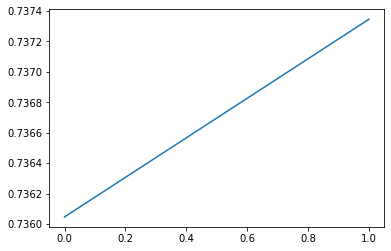

In [36]:
plt.plot(range(2),scores)

In [40]:
knn2 = KNeighborsClassifier(n_neighbors=28)   
knn2.fit(X_train_tok,y_train)
print(knn2.score(X_train_tok,y_train))
print(knn2.score(X_test_tok,y_test))

0.7539233038348082
0.7484955752212389


In [41]:
y_pred = knn2.predict(X_test_tok)

In [42]:
accuracy_score(y_test, y_pred)

0.7484955752212389

In [43]:
y_pred_test = knn2.predict(testmain_df_tok)

In [44]:
results_KNN = pd.DataFrame(y_pred_test)

In [45]:
original_KNN = pd.read_csv('./data2/test_data_bagged.csv')

In [46]:
original_KNN['predictions'] = y_pred_test

In [47]:
original_KNN.to_csv('./data/test2_knn.csv', index=False)

In [48]:
original_KNN['predictions'].value_counts()

1    89
0    89
Name: predictions, dtype: int64